<a href="https://colab.research.google.com/github/imaboylol/itmo-advanced-ml-and-dl/blob/main/regression/Regression_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

Всего датасет содержит 159 записей. Мы предварительно зарезервировали часть датасета для задания по преодолению бейслайна (baseline). В настоящем задании подразумевается работа с датасетом, содержащим 119 записей.

# 0. Применение полиномиальной регрессии для предсказания непрерывного параметра

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Наша цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки с параметрами, указанными в вашем задании. Используйте стратификацию по колонке <code>Species</code>. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [3]:
# < ENTER YOUR CODE HERE >
df = pd.read_csv('fish_train.csv', header=None, delimiter=';')
df = df.rename(columns={0: "features"})
df_to_split = df['features'].str.split(',',expand=True)
df_to_split = df_to_split.rename(columns={0: "Species", 1: "Weight", 2: "Length1", 3: "Length2", 4: "Length3", 5: "Height", 6: "Width"})
df_to_split = df_to_split.drop([0], inplace=False)
df_to_split.iloc[:, 1:] = df_to_split.iloc[:, 1:].astype(float)
df_to_split

,Species,Weight,Length1,Length2,Length3,Height,Width
1,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
2,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
3,Bream,430.0,26.5,29.0,34.0,12.444,5.134
4,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
5,Perch,110.0,19.0,21.0,22.5,5.6925,3.555
...,...,...,...,...,...,...,...
115,Parkki,273.0,23.0,25.0,28.0,11.088,4.144
116,Pike,500.0,42.0,45.0,48.0,6.96,4.896
117,Whitefish,1000.0,37.3,40.0,43.5,12.354,6.525
118,Perch,120.0,20.0,22.0,23.5,6.11,3.4075


In [4]:
# < ENTER YOUR CODE HERE >
X = df_to_split.drop(columns=['Weight', 'Species'])
#X = pd.get_dummies(X, columns=['Species'], drop_first=True)  # Кодирование категорий для Species
y = df_to_split['Weight']

# Разделение на обучающую и тестовую выборки с параметрами test_size=0.2 и random_state=11, с использованием стратификации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=df_to_split['Species'])

Вычислите выборочное среднее столбца Width

In [ ]:
mean_train = X_train['Width'].mean()
mean_train

4.498425263157894

# 1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (<code>LinearRegression()</code>) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики <code>r2_score()</code>.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R^2 score:", r2)

R^2 score: 0.8244231342772975


# 2. Добавление предварительной обработки признаков.

## Использование PCA

При помощи, например, <code>sns.heatmap()</code>, постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

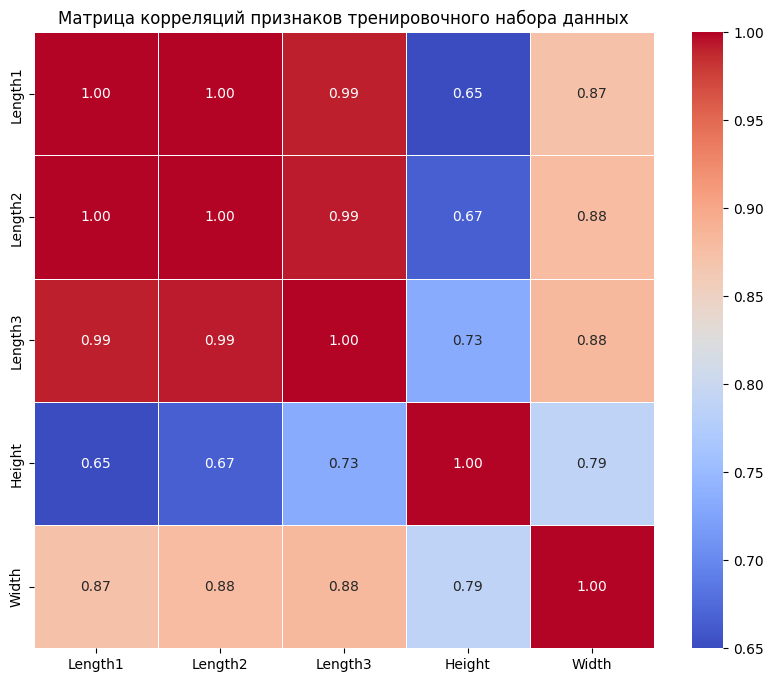

In [7]:
# < ENTER YOUR CODE HERE >
corr_matrix = X_train.corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляций признаков тренировочного набора данных")
plt.show()

Линейные модели достаточно плохо реагируют на коррелированные признаки, поэтому от таких признаков имеет смысл избавиться еще до начала обучения.

Для уменьшения количества неинформативных измерений используйте метод главных компонент.

1) Примените метод главных компонент (<code>PCA(n_components=3, svd_solver='full')</code>) для трех найденных наиболее коррелированных признаков.

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты.

3) Замените три наиболее коррелированных признака на новый признак <code>Lengths</code>, значения которого совпадают со значениями счетов первой главной компоненты.

In [8]:
# < ENTER YOUR CODE HERE >
# Выделение трех наиболее коррелированных признаков
most_correlated_features = ['Length1', 'Length2', 'Length3']
X_train_corr = X_train[most_correlated_features]
X_test_corr = X_test[most_correlated_features]

# Обучение модели PCA на тренировочных данных для трех коррелированных признаков
pca = PCA(n_components=3, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_corr)
X_test_pca = pca.transform(X_test_corr)

# Доля объясненной дисперсии для первой главной компоненты
explained_variance_first_component = pca.explained_variance_ratio_[0]
print("Доля объясненной дисперсии первой главной компонентой:", explained_variance_first_component)

Доля объясненной дисперсии первой главной компонентой: 0.9960937799357052


Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование `PCA` не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [9]:
# < ENTER YOUR CODE HERE >
pca = PCA(n_components=1)
X_train_lengths = pca.fit_transform(X_train_corr)
X_test_lengths = pca.transform(X_test_corr)

# Добавление нового признака 'Lengths' и удаление старых признаков
X_train = X_train.drop(columns=most_correlated_features)
X_train['Lengths'] = X_train_lengths

X_test = X_test.drop(columns=most_correlated_features)
X_test['Lengths'] = X_test_lengths

# Доля объясненной дисперсии первой главной компонентой
explained_variance_first_component = pca.explained_variance_ratio_[0]
print("Доля объясненной дисперсии первой главной компонентой:", explained_variance_first_component)

# Проверка преобразованных данных
print("Тренировочные данные с новым признаком 'Lengths':\n", X_train.head())
print("Тестовые данные с новым признаком 'Lengths':\n", X_test.head())

Доля объясненной дисперсии первой главной компонентой: 0.9960937799357038
Тренировочные данные с новым признаком 'Lengths':
       Height   Width    Lengths
98    7.0866   3.906  -5.647250
38    12.604   8.142  24.959486
22     11.73   7.225  19.068600
41   10.3458  3.6636  -9.496090
117   12.354   6.525  19.848407
Тестовые данные с новым признаком 'Lengths':
      Height   Width    Lengths
72    6.275   3.725  -9.543681
107    2.43   1.269 -28.287395
24   6.9153  3.6312  -8.280821
92   5.2224  3.3216 -19.131812
105  5.7078   4.158   9.874373


Обучите базовую модель линейной регрессии на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи <code>r2_score()</code>.

In [10]:
# < ENTER YOUR CODE HERE >

model_lens = LinearRegression()
model_lens.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model_lens.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R^2 score:", r2)

R^2 score: 0.820736605192954


Видно, что точность значительно не изменилась.

## Модификация признаков

Масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

$$
m = \rho \cdot V.
$$

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

$$
m\sim V\sim d^3
$$

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (<code>Height, Width, Lengths</code>), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

In [11]:
# < ENTER YOUR CODE HERE >
X_train_cubed = X_train ** 3
X_test_cubed = X_test ** 3
# Восстанавливаем категориальный признак 'Species' в итоговом DataFrame
#data_transformed = pd.concat([X_train_cubed[['Species']], X_train_cubed], axis=1)

# Проверка результата
#print("Train после возведения в куб:\n", X_train_cubed)
#print("Test после возведения в куб:\n", X_test_cubed)

Введите выборочное среднее колонки <code>Width</code> тренировочного набора данных после возведения в куб.

In [12]:
# < ENTER YOUR CODE HERE >
mean_width_train = X_train['Width'].mean()
mean_width_train_cubed = X_train_cubed['Width'].mean()
print(mean_width_train)
print(mean_width_train_cubed)

4.498425263157894
129.5619843339349


Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи `r2_score()`.

In [13]:
# < ENTER YOUR CODE HERE >
model_lens_cubed = LinearRegression()
model_lens_cubed.fit(X_train_cubed, y_train)

# Предсказание и оценка модели
y_pred = model_lens_cubed.predict(X_test_cubed)
r2 = r2_score(y_test, y_pred)

print("R^2 score:", r2)

R^2 score: 0.9701660036773125


Обратите внимание на то, как такая нехитрая работа с признаками помогла разительно улучшить точность модели!

## Добавление категориальных признаков

Произведите <code>one-hot</code> кодировние категориального признака `Species`, например, с помощью <code>pd.get_dummies()</code>.

Обучите модель линейной регресси на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

<b>Примечание</b>: Мы специально использовали стратифицированное разделение, чтобы все значения категориального признака <code>Species</code> присутствовали во всех наборах данных. Но такое возможно не всегда. Про то, как с этим бороться можно почитать, [например, здесь](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [14]:
X_train_cubed

,Height,Width,Lengths
98,355.88834,59.593201,-180.098859
38,2002.281725,539.750799,15549.159035
22,1613.964717,377.149516,6933.562190
41,1107.368679,49.172711,-856.316681
117,1885.483738,277.805953,7819.463223
...,...,...,...
9,540.427262,76.684372,-53.400932
79,473.093337,115.501303,26127.565020
96,284.526777,12.393748,-11696.616856
59,1288.268628,323.393901,2344.545079


In [15]:
X_test_cubed

,Height,Width,Lengths
72,247.082047,51.686703,-869.256116
107,14.348907,2.043548,-22634.914960
24,330.699148,47.8796,-567.832335
92,142.432927,36.647301,-7002.745344
105,185.954307,71.887512,962.783488
109,6812.536313,287.888218,3748.346148
50,922.986233,31.467701,-1798.000838
104,622.310904,35.754358,-2518.235521
17,5.257132,1.149705,-35086.667347
68,368.170147,81.464295,-20.643309


In [16]:
# < ENTER YOUR CODE HERE >
X = df_to_split.drop(columns=['Weight'])
#X = pd.get_dummies(X, columns=['Species'], drop_first=True)  # Кодирование категорий для Species
y = df_to_split['Weight']

# Разделение на обучающую и тестовую выборки с параметрами test_size=0.2 и random_state=11, с использованием стратификации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=df_to_split['Species'])

In [17]:
most_correlated_features = ['Length1', 'Length2', 'Length3']
X_train_corr = X_train[most_correlated_features]
X_test_corr = X_test[most_correlated_features]

# Обучение модели PCA на тренировочных данных для трех коррелированных признаков
pca = PCA(n_components=3, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_corr)
X_test_pca = pca.transform(X_test_corr)

# Доля объясненной дисперсии для первой главной компоненты
explained_variance_first_component = pca.explained_variance_ratio_[0]
print("Доля объясненной дисперсии первой главной компонентой:", explained_variance_first_component)

Доля объясненной дисперсии первой главной компонентой: 0.9960937799357052


In [18]:
pca = PCA(n_components=1)
X_train_lengths = pca.fit_transform(X_train_corr)
X_test_lengths = pca.transform(X_test_corr)

# Добавление нового признака 'Lengths' и удаление старых признаков
X_train = X_train.drop(columns=most_correlated_features)
X_train['Lengths'] = X_train_lengths

X_test = X_test.drop(columns=most_correlated_features)
X_test['Lengths'] = X_test_lengths

# Доля объясненной дисперсии первой главной компонентой
explained_variance_first_component = pca.explained_variance_ratio_[0]
print("Доля объясненной дисперсии первой главной компонентой:", explained_variance_first_component)

# Проверка преобразованных данных
print("Тренировочные данные с новым признаком 'Lengths':\n", X_train.head())
print("Тестовые данные с новым признаком 'Lengths':\n", X_test.head())

Доля объясненной дисперсии первой главной компонентой: 0.9960937799357038
Тренировочные данные с новым признаком 'Lengths':
        Species   Height   Width    Lengths
98       Roach   7.0866   3.906  -5.647250
38       Perch   12.604   8.142  24.959486
22       Perch    11.73   7.225  19.068600
41      Parkki  10.3458  3.6636  -9.496090
117  Whitefish   12.354   6.525  19.848407
Тестовые данные с новым признаком 'Lengths':
     Species  Height   Width    Lengths
72    Perch   6.275   3.725  -9.543681
107   Smelt    2.43   1.269 -28.287395
24    Roach  6.9153  3.6312  -8.280821
92    Perch  5.2224  3.3216 -19.131812
105    Pike  5.7078   4.158   9.874373


In [19]:
X_train_numeric = X_train.drop(columns=['Species'])
X_train_numeric = X_train_numeric ** 3

# Восстанавливаем категориальный признак 'Species' в итоговом DataFrame
X_train_f = pd.concat([X_train[['Species']], X_train_numeric], axis=1)
X_train_f

,Species,Height,Width,Lengths
98,Roach,355.88834,59.593201,-180.098859
38,Perch,2002.281725,539.750799,15549.159035
22,Perch,1613.964717,377.149516,6933.562190
41,Parkki,1107.368679,49.172711,-856.316681
117,Whitefish,1885.483738,277.805953,7819.463223
...,...,...,...,...
9,Whitefish,540.427262,76.684372,-53.400932
79,Pike,473.093337,115.501303,26127.565020
96,Parkki,284.526777,12.393748,-11696.616856
59,Perch,1288.268628,323.393901,2344.545079


In [20]:
X_test_numeric = X_test.drop(columns=['Species'])
X_test_numeric = X_test_numeric ** 3

# Восстанавливаем категориальный признак 'Species' в итоговом DataFrame
X_test_f = pd.concat([X_test[['Species']], X_test_numeric], axis=1)
X_test_f

,Species,Height,Width,Lengths
72,Perch,247.082047,51.686703,-869.256116
107,Smelt,14.348907,2.043548,-22634.914960
24,Roach,330.699148,47.8796,-567.832335
92,Perch,142.432927,36.647301,-7002.745344
105,Pike,185.954307,71.887512,962.783488
109,Bream,6812.536313,287.888218,3748.346148
50,Parkki,922.986233,31.467701,-1798.000838
104,Parkki,622.310904,35.754358,-2518.235521
17,Smelt,5.257132,1.149705,-35086.667347
68,Perch,368.170147,81.464295,-20.643309


In [21]:
X_train_f = pd.get_dummies(X_train_f, columns=['Species'], drop_first='True')
X_test_f = pd.get_dummies(X_test_f, columns=['Species'], drop_first='True')

In [22]:
model_f = LinearRegression()
model_f.fit(X_train_f, y_train)

# Предсказание и оценка модели
y_pred = model_f.predict(X_test_f)
r2 = r2_score(y_test, y_pred)

print("R^2 score:", r2)

R^2 score: 0.9679628452773897


И снова точность возрасла.

Как можно увидеть, после `one-hot` кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра `drop_first=True`. Заново обучите модель после исправления этого недочета. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

На таком сравнительно небольшом наборе данных, впрочем, разницы мы не видим.